In [90]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

In [91]:
df=pd.read_csv("/content/NF-UNSW-NB15 -Dataset.csv")
df

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack
0,149.171.126.0,62073,59.166.0.5,56082,6,0.0,9672,416,11,8,25,15,0,Benign
1,149.171.126.2,32284,59.166.0.5,1526,6,0.0,1776,104,6,2,25,0,0,Benign
2,149.171.126.0,21,59.166.0.1,21971,6,1.0,1842,1236,26,22,25,1111,0,Benign
3,59.166.0.1,23800,149.171.126.0,46893,6,0.0,528,8824,10,12,27,124,0,Benign
4,59.166.0.5,63062,149.171.126.2,21,6,1.0,1786,2340,32,34,25,1459,0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1623113,59.166.0.2,1640,149.171.126.8,53,17,0.0,130,162,2,2,0,0,0,Benign
1623114,59.166.0.2,3610,149.171.126.6,21,6,1.0,2044,2404,36,34,26,0,0,Benign
1623115,59.166.0.2,4667,149.171.126.6,40725,6,0.0,320,1918,6,8,27,0,0,Benign
1623116,59.166.0.2,5641,149.171.126.6,56243,6,0.0,528,8824,10,12,27,0,0,Benign


In [92]:
df['Attack'].value_counts()


,count
Attack,
Benign,1550712
Exploits,24736
Fuzzers,19463
Reconnaissance,12291
Generic,5570
DoS,5051
Analysis,1995
Backdoor,1782
Shellcode,1365


In [93]:
df.value_counts("Attack")

,count
Attack,
Benign,1550712
Exploits,24736
Fuzzers,19463
Reconnaissance,12291
Generic,5570
DoS,5051
Analysis,1995
Backdoor,1782
Shellcode,1365


In [94]:
df1=df.copy()
df1

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack
0,149.171.126.0,62073,59.166.0.5,56082,6,0.0,9672,416,11,8,25,15,0,Benign
1,149.171.126.2,32284,59.166.0.5,1526,6,0.0,1776,104,6,2,25,0,0,Benign
2,149.171.126.0,21,59.166.0.1,21971,6,1.0,1842,1236,26,22,25,1111,0,Benign
3,59.166.0.1,23800,149.171.126.0,46893,6,0.0,528,8824,10,12,27,124,0,Benign
4,59.166.0.5,63062,149.171.126.2,21,6,1.0,1786,2340,32,34,25,1459,0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1623113,59.166.0.2,1640,149.171.126.8,53,17,0.0,130,162,2,2,0,0,0,Benign
1623114,59.166.0.2,3610,149.171.126.6,21,6,1.0,2044,2404,36,34,26,0,0,Benign
1623115,59.166.0.2,4667,149.171.126.6,40725,6,0.0,320,1918,6,8,27,0,0,Benign
1623116,59.166.0.2,5641,149.171.126.6,56243,6,0.0,528,8824,10,12,27,0,0,Benign


In [95]:
x=df1.drop(["Label","Attack"],axis=1)
x

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS
0,149.171.126.0,62073,59.166.0.5,56082,6,0.0,9672,416,11,8,25,15
1,149.171.126.2,32284,59.166.0.5,1526,6,0.0,1776,104,6,2,25,0
2,149.171.126.0,21,59.166.0.1,21971,6,1.0,1842,1236,26,22,25,1111
3,59.166.0.1,23800,149.171.126.0,46893,6,0.0,528,8824,10,12,27,124
4,59.166.0.5,63062,149.171.126.2,21,6,1.0,1786,2340,32,34,25,1459
...,...,...,...,...,...,...,...,...,...,...,...,...
1623113,59.166.0.2,1640,149.171.126.8,53,17,0.0,130,162,2,2,0,0
1623114,59.166.0.2,3610,149.171.126.6,21,6,1.0,2044,2404,36,34,26,0
1623115,59.166.0.2,4667,149.171.126.6,40725,6,0.0,320,1918,6,8,27,0
1623116,59.166.0.2,5641,149.171.126.6,56243,6,0.0,528,8824,10,12,27,0


In [96]:
y=df1[["Label"]]
y

,Label
0,0
1,0
2,0
3,0
4,0
...,...
1623113,0
1623114,0
1623115,0
1623116,0


In [97]:
y.value_counts()

,count
Label,
0,1550712
1,72406


In [98]:
y.shape,x.shape

((1623118, 1), (1623118, 12))

In [99]:
label_encoder=LabelEncoder()
x["IPV4_SRC_ADDR"]=label_encoder.fit_transform(x["IPV4_SRC_ADDR"])
x["IPV4_DST_ADDR"]=label_encoder.fit_transform(x["IPV4_DST_ADDR"])

In [100]:
x["IPV4_SRC_ADDR"].value_counts(), x["IPV4_DST_ADDR"].value_counts()

(IPV4_SRC_ADDR
 35    153762
 31    153439
 34    153404
 32    153188
 30    152851
 33    152423
 39    147747
 38    146974
 36    146927
 37    146256
 26     29665
 28     28308
 25     27496
 27     26127
 3        505
 2        497
 0        474
 20       270
 6        259
 17       259
 21       248
 23       239
 19       237
 18       236
 24       223
 22       222
 5        210
 15       148
 9        103
 11        87
 12        76
 7         73
 1         60
 10        46
 14        24
 16        20
 29        19
 13         8
 8          7
 4          1
 Name: count, dtype: int64,
 IPV4_DST_ADDR
 4     153450
 17    153394
 15    153378
 16    153309
 18    152881
 3     152249
 20    147754
 19    147576
 22    147328
 21    145652
 12     15319
 8      13152
 6      11948
 5      11058
 14     10932
 10     10536
 11     10496
 9      10053
 7       9349
 13      8759
 29       940
 31       288
 30       271
 39       263
 1        259
 32       253
 28       250
 35 

In [101]:
smote = SMOTE(sampling_strategy= 'minority')
x_new,y_new = smote.fit_resample(x,y)
y_new.value_counts()

,count
Label,
0,1550712
1,1550712


In [102]:
scaler=MinMaxScaler(feature_range=(0,1))
x_scaled=scaler.fit_transform(x_new)
x_scaled

array([[1.28205128e-01, 9.47173266e-01, 8.97435897e-01, ...,
        7.25689405e-04, 8.06451613e-01, 3.49247209e-06],
       [4.35897436e-01, 4.92622263e-01, 8.97435897e-01, ...,
        1.81422351e-04, 8.06451613e-01, 0.00000000e+00],
       [1.28205128e-01, 3.20439460e-04, 7.94871795e-01, ...,
        1.99564586e-03, 8.06451613e-01, 2.58675766e-04],
       ...,
       [6.66666667e-01, 2.15442130e-01, 1.79487179e-01, ...,
        7.25689405e-04, 6.12903226e-01, 2.74042644e-04],
       [6.92307692e-01, 6.01052873e-01, 3.33333333e-01, ...,
        1.08853411e-03, 6.12903226e-01, 4.37723169e-05],
       [7.17948718e-01, 3.54879072e-01, 2.30769231e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [103]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y_new,train_size=0.9,random_state=42,shuffle=True,stratify=y_new)


In [104]:
model= keras.Sequential([
        keras.layers.Dense(128,activation='relu',input_shape=(12,)),
        keras.layers.Dense(64,activation='relu',input_shape=(12,)),
        keras.layers.Dense(1,activation='sigmoid')
])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,batch_size=100,shuffle=True,epochs=32)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/32
27913/27913 ━━━━━━━━━━━━━━━━━━━━ 67s 2ms/step - accuracy: 0.9807 - loss: 0.0700
Epoch 2/32
27913/27913 ━━━━━━━━━━━━━━━━━━━━ 65s 2ms/step - accuracy: 0.9883 - loss: 0.0434
Epoch 3/32
27913/27913 ━━━━━━━━━━━━━━━━━━━━ 65s 2ms/step - accuracy: 0.9888 - loss: 0.0404
Epoch 4/32
27913/27913 ━━━━━━━━━━━━━━━━━━━━ 65s 2ms/step - accuracy: 0.9893 - loss: 0.0383
Epoch 5/32
27913/27913 ━━━━━━━━━━━━━━━━━━━━ 65s 2ms/step - accuracy: 0.9894 - loss: 0.0379
Epoch 6/32
27913/27913 ━━━━━━━━━━━━━━━━━━━━ 64s 2ms/step - accuracy: 0.9894 - loss: 0.0377
Epoch 7/32
27913/27913 ━━━━━━━━━━━━━━━━━━━━ 82s 2ms/step - accuracy: 0.9895 - loss: 0.0370
Epoch 8/32
27913/27913 ━━━━━━━━━━━━━━━━━━━━ 82s 2ms/step - accuracy: 0.9894 - loss: 0.0370
Epoch 9/32
27913/27913 ━━━━━━━━━━━━━━━━━━━━ 65s 2ms/step - accuracy: 0.9894 - loss: 0.0368
Epoch 10/32
27913/27913 ━━━━━━━━━━━━━━━━━━━━ 82s 2ms/step - accuracy: 0.9895 - loss: 0.0364
Epoch 11/32
27913/27913 ━━━━━━━━━━━━━━━━━━━━ 84s 2ms/step - accuracy: 0.9894 - loss: 0.03

In [105]:
y_Pred=model.predict(x_test)
y_pred=np.round(y_Pred).astype(int)
category_names=["Benign","Attack"]
report=classification_report(y_test,y_pred,target_names=category_names,labels=[0,1],digits=4)
print(report)

9692/9692 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step
              precision    recall  f1-score   support

      Benign     0.9996    0.9800    0.9897    155072
      Attack     0.9804    0.9996    0.9899    155071

    accuracy                         0.9898    310143
   macro avg     0.9900    0.9898    0.9898    310143
weighted avg     0.9900    0.9898    0.9898    310143



Benign = 0
Attack = 1


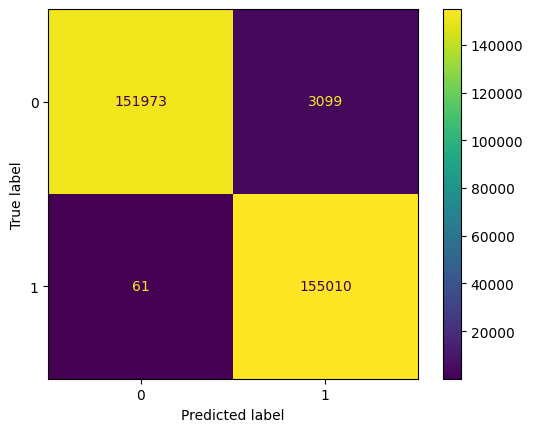

In [106]:
confusion_matrix=ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
confusion_matrix
print("Benign = 0")
print("Attack = 1")